In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
from google.colab.files import upload
file = upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data = data.dropna ()

In [5]:
X = data.drop('target', axis=1)
y = data['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
 data.shape


(303, 14)

In [9]:
data["sex"].unique()

array([1, 0])

In [10]:
data["cp"].unique()

array([3, 2, 1, 0])

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
X = data.drop('target', axis=1)
y = data['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform (X_train)
X_test_scaled = scaler.transform(X_test)

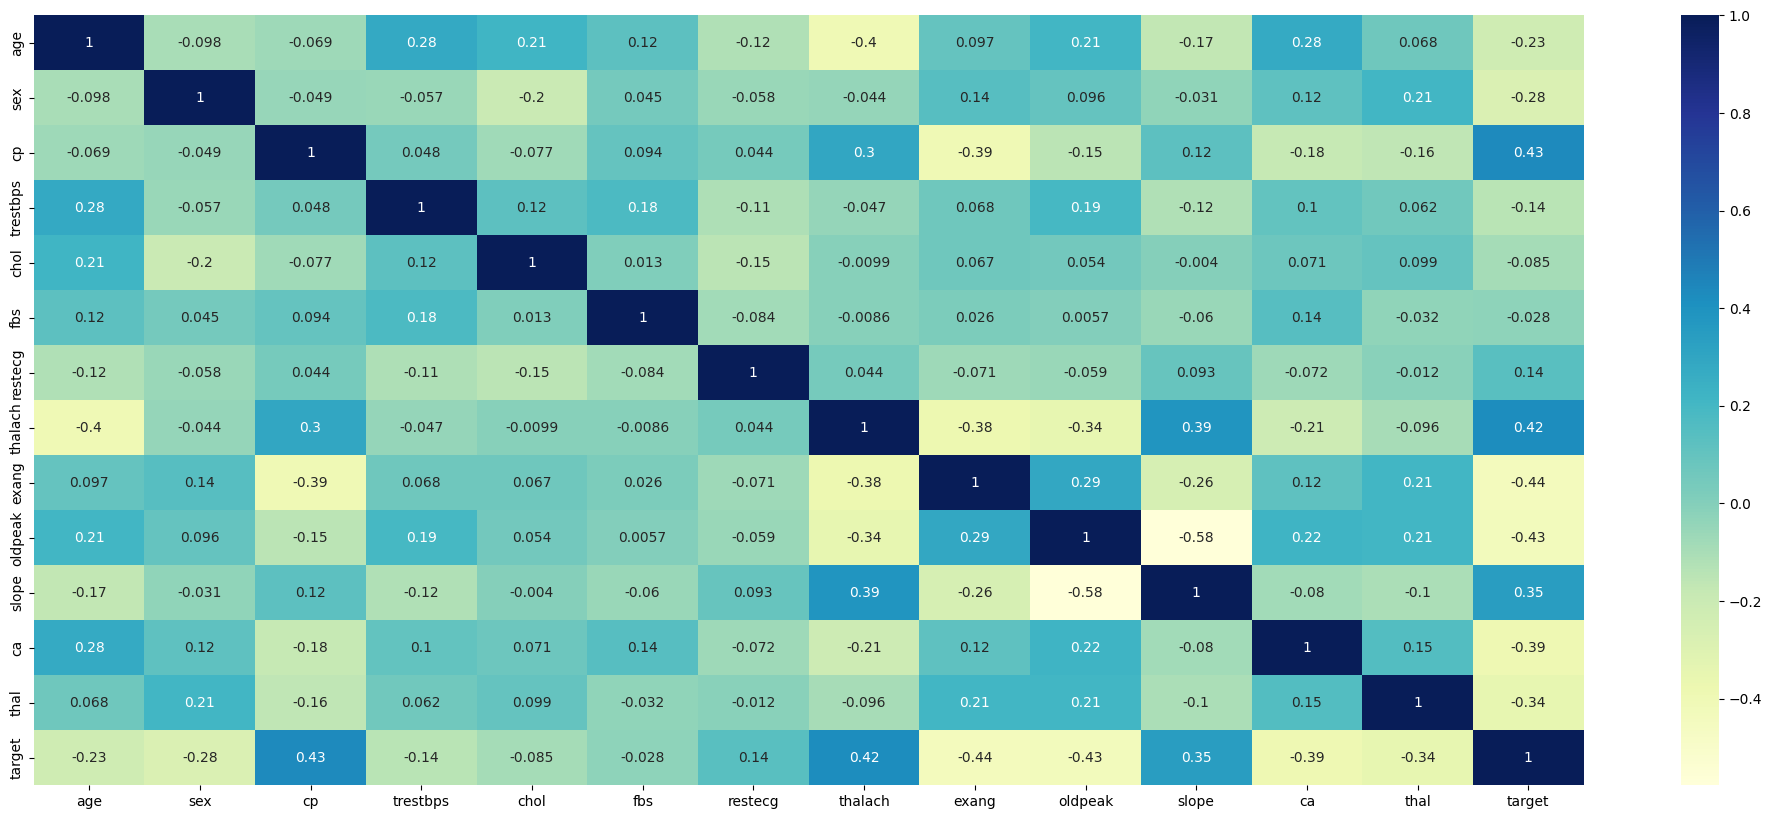

In [16]:
import seaborn as sns

corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(25, 10))
#plot heat map
g = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap="YlGnBu")


**This is for Decision Tree Algorithm**

Decision Tree Accuracy:  0.7540983606557377


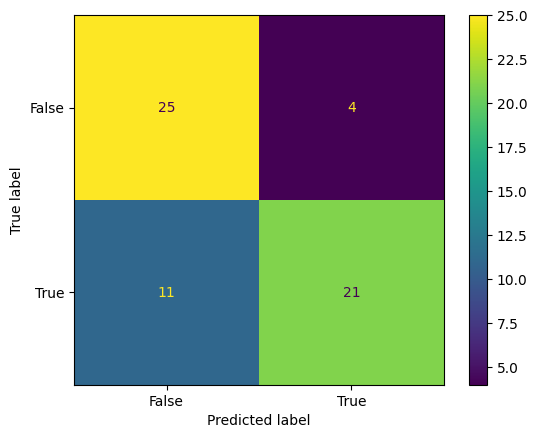

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy: ", acc_dt)
# Generate the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=[False, True])
cm_display.plot()
plt.show()


**Support Vector Machine (SVM)**

Support Vector Machine Accuracy: 0.8688524590163934


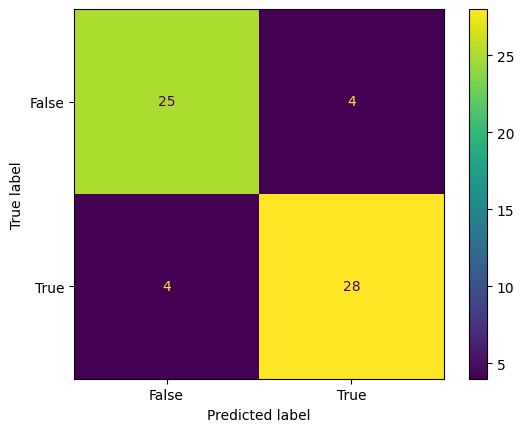

In [23]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
acc_svm = accuracy_score (y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", acc_svm)
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
# Display the confusion matrix
cm_display= ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=[False, True])
cm_display.plot()
plt.show()


**Naive Bayes**

Naive Bayes Accuracy:  0.8688524590163934


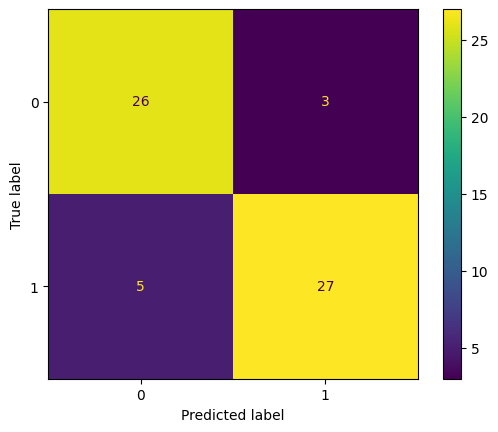

In [28]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score (y_test, y_pred_nb)
print("Naive Bayes Accuracy: ", acc_nb)
# Generate the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=nb_model.classes_)
cm_display.plot()
plt.show()


**Random Forest**

Random Forest Accuracy: 0.8360655737704918


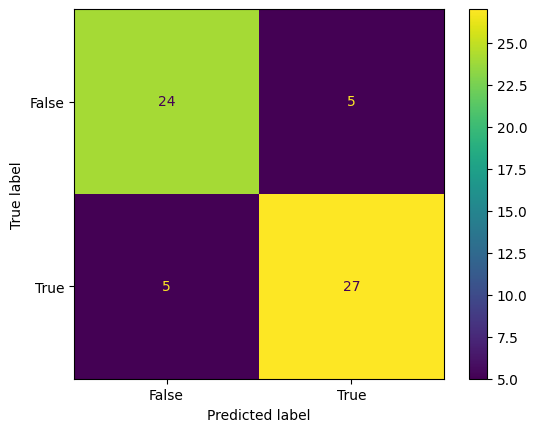

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix(y_test, y_pred_rf)
# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=[False, True])
cm_display.plot()
plt.show()

**Logistic Regression**

Logistic Regression Accuracy:  0.8524590163934426


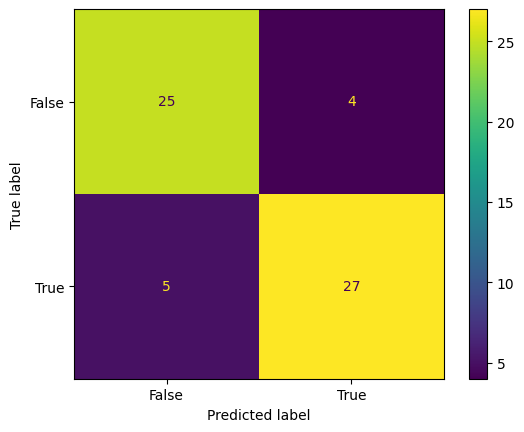

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined
# Train the Logistic Regression model
logreg_model = LogisticRegression (random_state=42)
logreg_model.fit(X_train_scaled, y_train)
# Make predictions on the test data
y_pred_logreg = logreg_model.predict(X_test_scaled)
# Compute the accuracy of the predictions
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy: ", acc_logreg)
# Generate the confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logreg, display_labels=[False, True])
cm_display.plot()
plt.show()


**Artificial Neural Network**

2/2 [==============================] - 0s 9ms/step - loss: 1.4166 - accuracy: 0.8361
Artificial Neural Network Accuracy: 0.8360655903816223
2/2 [==============================] - 0s 5ms/step


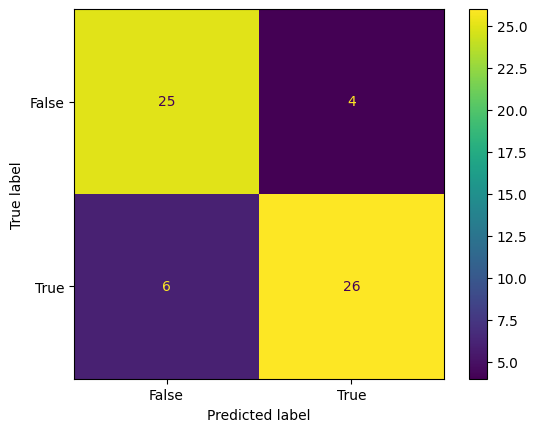

In [45]:
ann_model = Sequential()
ann_model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_model.add(Dense (units=64, activation='relu'))
ann_model.add (Dense (units=1, activation= 'sigmoid'))
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data= (X_test_scaled, y_test), verbose=0)
__, acc_ann = ann_model.evaluate(X_test_scaled, y_test)
print("Artificial Neural Network Accuracy:", acc_ann)
# Predict probabilities using the ANN model
y_pred_prob_ann = ann_model.predict(X_test_scaled)
# Convert probabilities to class labels
y_pred_ann = (y_pred_prob_ann > 0.5).astype (int)
# Generate the confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
# Display the confusion matrix
cm_display= ConfusionMatrixDisplay (confusion_matrix=conf_matrix_ann, display_labels=[False, True])
cm_display.plot()
plt.show()

**KNN**

KNN Accuracy:  0.6885245901639344


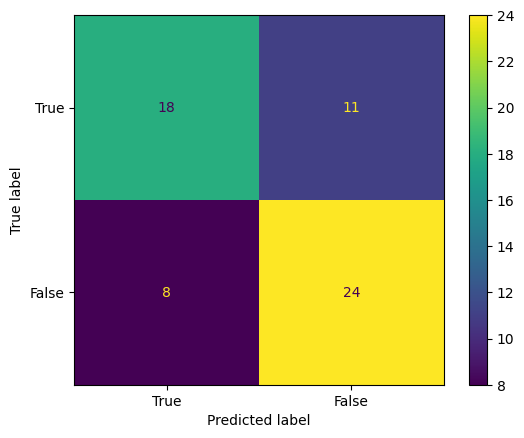

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Assuming you have your X_train, X_test, y_train, y_test defined
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model
knn.fit(X_train, y_train)
# Predict on the test set
y_pred_knn = knn.predict(X_test)
# Calculate the accuracy of the KNN model
# Adjust n_neighbors as needed
acc_knn = accuracy_score (y_test, y_pred_knn)
print("KNN Accuracy: ", acc_knn)
# Generate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
# Display the confusion matrix
cm_display = ConfusionMatrixDisplay (confusion_matrix=conf_matrix_knn, display_labels = [True, False])
cm_display.plot()
plt.show()


**Bar Diagram**

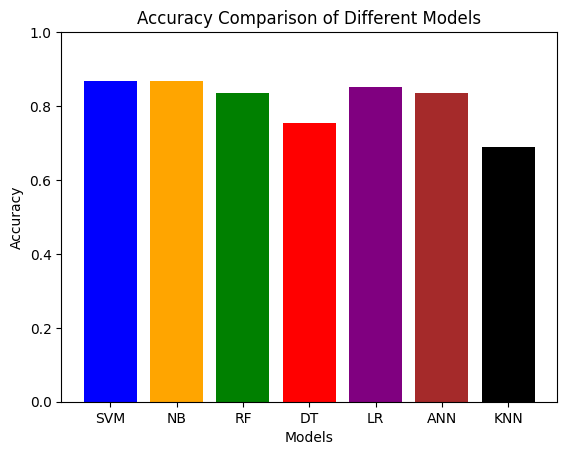

In [53]:
# Placeholder value, replace with actual accuracy
acc_dt = 0.7540983606557377
acc_svm = 0.8688524590163934
acc_nb = 0.8688524590163934
acc_rf = 0.8360655737704918
acc_logreg = 0.8524590163934426
acc_ann = 0.8360655903816223
acc_knn = 0.6885245901639344

# Plotting the bar chart
models = ['SVM', 'NB', 'RF', 'DT', 'LR', 'ANN', 'KNN']
accuracies = [acc_svm, acc_nb, acc_rf, acc_dt, acc_logreg, acc_ann, acc_knn]
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'black'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

**Performance**

2/2 [==============================] - 0s 3ms/step
Model		Accuracy	Recall		MCC		Precision	F1 Score
 SVM:	0.8689		0.8750		0.7371 		0.8750		0.8750
 Naive Bayes:	0.8689		0.8438		0.7395 		0.9000		0.8710
 Random Forest:	0.8361		0.8438		0.6713 		0.8438		0.8438
 Decision Tree:	0.7541		0.6562		0.5263 		0.8400		0.7368
 Logistic Regression:	0.8525		0.8438		0.7051 		0.8710		0.8571
 ANN:	0.8361		0.8125		0.6738 		0.8667		0.8387


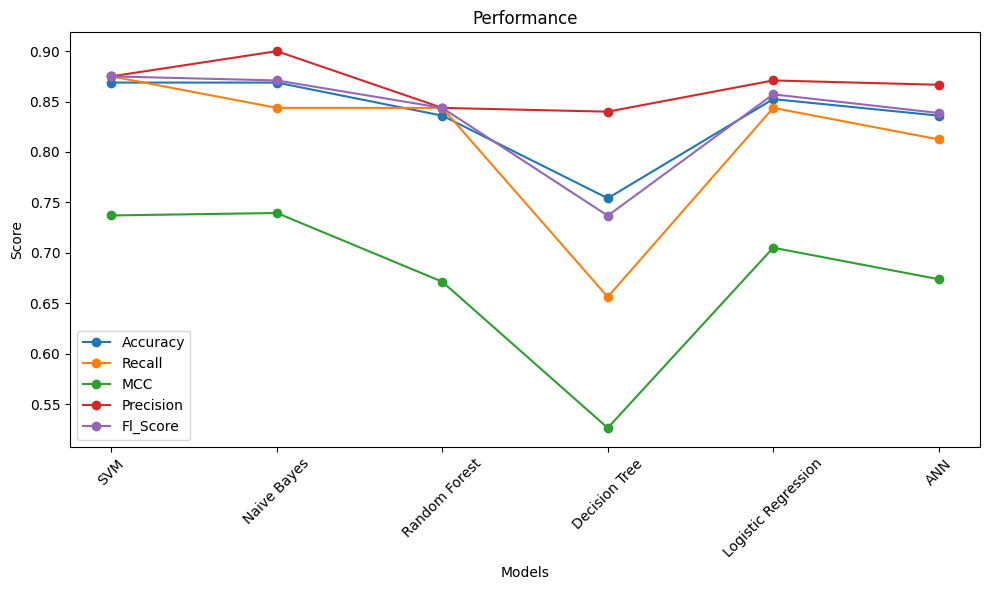

In [75]:
from sklearn.metrics import accuracy_score, recall_score, matthews_corrcoef, precision_score, f1_score
# Support Vector Machine (SVM)
acc_svm = accuracy_score (y_test, y_pred_svm)
rec_svm = recall_score (y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
prec_svm = precision_score (y_test, y_pred_svm)
fl_svm =  f1_score(y_test, y_pred_svm)
#Naive Bayes
acc_nb = accuracy_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
mcc_nb = matthews_corrcoef(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
fl_nb = f1_score(y_test, y_pred_nb)
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test) # Predicting the target variable for the test set
mcc_rf = matthews_corrcoef (y_test, y_pred_rf)
acc_rf = accuracy_score (y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
prec_rf = precision_score (y_test, y_pred_rf)
fl_rf = f1_score (y_test, y_pred_rf)

#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test) # Predicting the targe variable for the test set
acc_dt = accuracy_score(y_test, y_pred_dt)
rec_dt = recall_score (y_test, y_pred_dt)
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
fl_dt = f1_score(y_test, y_pred_dt)

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
rec_logreg = recall_score(y_test, y_pred_logreg)
mcc_logreg = matthews_corrcoef(y_test, y_pred_logreg)
prec_logreg = precision_score(y_test, y_pred_logreg)
fl_logreg = f1_score(y_test, y_pred_logreg)

# Predicting the target variable for the test set
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_model.add(Dense(units=64, activation= 'relu'))
ann_model.add(Dense (units=1, activation='sigmoid'))
# Compile the ANN model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fit the ANN model to the training data
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data= (X_test_scaled, y_test), verbose=0)
#Evaluate the ANN model on the test set
_, acc_ann = ann_model.evaluate(X_test_scaled, y_test)
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")
from sklearn.metrics import recall_score, matthews_corrcoef, precision_score, f1_score
# ANN model predictions and metrics
y_pred_ann_binary = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")
acc_ann = accuracy_score(y_test, y_pred_ann_binary)
rec_ann = recall_score(y_test, y_pred_ann_binary)
mcc_ann = matthews_corrcoef(y_test, y_pred_ann_binary)
prec_ann = precision_score(y_test, y_pred_ann_binary)
fl_ann = f1_score(y_test, y_pred_ann_binary)
# Display metrics
models = ['SVM', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'ANN']
accuracies = [acc_svm, acc_nb, acc_rf, acc_dt, acc_logreg, acc_ann]
recalls = [rec_svm, rec_nb, rec_rf, rec_dt, rec_logreg, rec_ann]
mcc_scores = [mcc_svm, mcc_nb, mcc_rf, mcc_dt, mcc_logreg, mcc_ann]
precisions = [prec_svm, prec_nb, prec_rf, prec_dt, prec_logreg, prec_ann]
f1_score = [fl_svm, fl_nb, fl_rf, fl_dt, fl_logreg, fl_ann]
print("Model\t\tAccuracy\tRecall\t\tMCC\t\tPrecision\tF1 Score")
for i in range (len (models)):
  print(f" {models[i]}:\t{accuracies[i]:.4f}\t\t{recalls[i]:.4f}\t\t{mcc_scores [i]:.4f} \t\t{precisions[i]:.4f}\t\t{f1_score[i]:.4f}")


import matplotlib.pyplot as plt
#Define metrics
metrics = {
'Accuracy': accuracies,
'Recall': recalls,
'MCC': mcc_scores,
'Precision': precisions,
'Fl_Score': f1_score
}
# Plotting
plt.figure(figsize=(10, 6))
#Loop through each metric
for metric_name, metric_values in metrics.items():
    plt.plot(models, metric_values, marker='o', label=metric_name)
# Add legend and labels.
plt.legend()
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance')
plt.xticks(rotation=45)
# Show plot
plt.tight_layout()
plt.show()